In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install wordcloud

In [3]:
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id = 'ypRu8rID2tnDuSbiwo-tkQ',
    client_secret = 'GfPsA96bbv0EhHh3lYaLV4BdSOAzAw',
    user_agent = 'praw'
)
# This function returns a Pandas dataframe
# containing reddit post comments, given its id
def getComments(id):
    submission = reddit.submission(id)
    pandas_list = []
    commentsList = submission.comments.list()
    # 'limit' parameter can be increased 
    # in order to expand more comments
    submission.comments.replace_more(limit=64)
    print(len(commentsList))
    i = 0
    for c in commentsList:
        if isinstance(c, praw.models.MoreComments):
            continue
        commentText = c.body
        if commentText in {'[deleted]', '[removed]'}:
            continue
        pandas_list.append([i, commentText])
        i+=1
    df = pd.DataFrame(pandas_list)
    df.columns = ['id', 'description']
    return df

In [4]:
corpus = getComments('1detli')

print(corpus.shape)
corpus.head()

902
(452, 2)


,id,description
0,0,My father passed away last year. One item he ...
1,1,My mom told me this story the other day and it...
2,2,"When I was 15, my mother and I were standing i..."
3,3,Scariest moment of my life happened while my f...
4,4,I saw a 'shadow person' once.\n\nI didn't know...


In [5]:
print('First spooky story : ',corpus.loc[0,'description'])

First spooky story :  My father passed away last year.  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather.  For years he had this shotgun stashed in the attic.  After he passed, I had gone in the attic to look for it, only to find that it wasn't there.

A few months later, I had a dream in which I was talking to him and I asked him where he had put the shotgun.  He told me it was in the closet of a spare bedroom.  I called my mother and had her check, and sure enough that's where it was.

Now it's completely possible that my father had told me that when he was alive, and the dream was little more than a memory, but I certainly don't recall that being the case.


In [6]:
import re
# Видалення HTML елементів 

# CODE_START
def remove_html(text):
    if pd.isna(text): return "" # Обробка NaN
    text_str = str(text) # Конвертація в рядок
    clean = re.sub(r'<[^>]+>', '', text_str) # Видалення тегів
    # Заміна HTML сутностей
    clean = clean.replace('&', '&').replace('<', '<').replace('>', '>').replace('"', '"').replace("'", "'").replace(' ', ' ')
    return clean

if 'clean_description' not in corpus.columns:
    corpus['clean_description'] = corpus['description'].apply(remove_html)
else:
    corpus['clean_description'] = corpus['clean_description'].apply(remove_html)
# CODE_END

# Видалення спеціальних символів та чисел 

# CODE_START
def remove_special_chars_and_numbers(text):
    if pd.isna(text): return "" # Обробка NaN
    text_str = str(text) # Конвертація в рядок
    no_digits = re.sub(r'\d+', '', text_str) # Видалення цифр
    # Залишаємо літери (англ.), пробіли, базову пунктуацію
    clean = re.sub(r'[^a-zA-Z\s.,!?\'"-]', '', no_digits)
    clean = re.sub(r'\s+', ' ', clean).strip() # Нормалізація пробілів
    return clean

corpus['clean_description'] = corpus['clean_description'].apply(remove_special_chars_and_numbers)
# CODE_END


In [7]:
# Lowercase
# CODE_START
if 'clean_description' in corpus.columns: # Перевірка наявності стовпця
    corpus['clean_description'] = corpus['clean_description'].str.lower()
else:
    print("стовпець 'clean_description' не знайдено.") # Повідомлення про помилку
# CODE_END

if not corpus.empty and 0 in corpus.index and 'clean_description' in corpus.columns:
    print('Перша історія у нижньому регістрі: ', corpus.loc[0, 'clean_description'])
elif 'clean_description' not in corpus.columns:
    pass # Помилка вже оброблена
else:
    print("Корпус порожній або не містить елемента з індексом 0.")

Перша історія у нижньому регістрі:  my father passed away last year. one item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather. for years he had this shotgun stashed in the attic. after he passed, i had gone in the attic to look for it, only to find that it wasn't there. a few months later, i had a dream in which i was talking to him and i asked him where he had put the shotgun. he told me it was in the closet of a spare bedroom. i called my mother and had her check, and sure enough that's where it was. now it's completely possible that my father had told me that when he was alive, and the dream was little more than a memory, but i certainly don't recall that being the case.


In [8]:
import nltk
## Tokenize the cleaned description
# CODE_START
if 'clean_description' in corpus.columns:
    # Застосовуємо nltk.word_tokenize до кожного рядка у стовпці 'clean_description'
    # Переконуємося, що обробляємо NaN значення, перетворюючи їх на порожні рядки перед токенізацією
    corpus['clean_tokens'] = corpus['clean_description'].fillna('').apply(nltk.word_tokenize)
else:
    print("стовпець 'clean_description' не знайдено для токенізації.")
    # Створюємо порожній стовпець, якщо 'clean_description' відсутній, щоб уникнути помилок далі
    corpus['clean_tokens'] = pd.Series([[] for _ in range(len(corpus))], index=corpus.index, dtype=object)

# CODE_END

print(corpus.head())

   id                                        description  \
0   0  My father passed away last year.  One item he ...   
1   1  My mom told me this story the other day and it...   
2   2  When I was 15, my mother and I were standing i...   
3   3  Scariest moment of my life happened while my f...   
4   4  I saw a 'shadow person' once.\n\nI didn't know...   

                                   clean_description  \
0  my father passed away last year. one item he a...   
1  my mom told me this story the other day and it...   
2  when i was , my mother and i were standing in ...   
3  scariest moment of my life happened while my f...   
4  i saw a 'shadow person' once. i didn't know th...   

                                        clean_tokens  
0  [my, father, passed, away, last, year, ., one,...  
1  [my, mom, told, me, this, story, the, other, d...  
2  [when, i, was, ,, my, mother, and, i, were, st...  
3  [scariest, moment, of, my, life, happened, whi...  
4  [i, saw, a, 'shadow, per

In [9]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag # Для визначення частини мови, що покращує лематизацію

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True) # Для WordNet
nltk.download('averaged_perceptron_tagger', quiet=True) # Для pos_tag

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# функція для перетворення тегів NLTK POS у формат, зрозумілий WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN # За замовчуванням іменник

def lemmatize_and_remove_stopwords(tokens):
    # Перевіряємо, чи tokens це список (і не NaN)
    if not isinstance(tokens, list):
        return [] # Повертаємо порожній список, якщо вхідні дані некоректні

    # Видалення стоп-слів
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # Отримання тегів частин мови
    pos_tagged_tokens = pos_tag(filtered_tokens)

    # Лематизація з урахуванням частини мови
    lemmatized_tokens = []
    for word, tag in pos_tagged_tokens:
        wn_tag = get_wordnet_pos(tag)
        lemmatized_word = lemmatizer.lemmatize(word, pos=wn_tag)
        lemmatized_tokens.append(lemmatized_word)
    return lemmatized_tokens

# CODE_START
if 'clean_tokens' in corpus.columns:
    corpus['clean_tokens'] = corpus['clean_tokens'].apply(lemmatize_and_remove_stopwords)
else:
    print("Помилка: стовпець 'clean_tokens' не знайдено для лематизації.")
    # Якщо стовпець відсутній, створюємо його порожнім, щоб уникнути помилок далі
    if 'clean_tokens' not in corpus.columns: # Додаткова перевірка, хоча умова вище вже це робить
         corpus['clean_tokens'] = pd.Series([[] for _ in range(len(corpus))], index=corpus.index, dtype=object)
# CODE_END

print(corpus.head())

   id                                        description  \
0   0  My father passed away last year.  One item he ...   
1   1  My mom told me this story the other day and it...   
2   2  When I was 15, my mother and I were standing i...   
3   3  Scariest moment of my life happened while my f...   
4   4  I saw a 'shadow person' once.\n\nI didn't know...   

                                   clean_description  \
0  my father passed away last year. one item he a...   
1  my mom told me this story the other day and it...   
2  when i was , my mother and i were standing in ...   
3  scariest moment of my life happened while my f...   
4  i saw a 'shadow person' once. i didn't know th...   

                                        clean_tokens  
0  [father, pass, away, last, year, one, item, al...  
1  [mom, tell, story, day, freak, fuck, old, sist...  
2  [mother, stand, kitchen, talk, rack, wall, hol...  
3  [scary, moment, life, happen, friend, camp, ea...  
4  [saw, person, know, call

In [10]:
import pandas as pd

# Put back tokens into one single string
# CODE_START
if 'clean_tokens' in corpus.columns:
    # Об'єднуємо список токенів у кожному рядку в один рядок, розділяючи токени пробілом.
    # передивляємось, що обробляємо випадки, коли 'clean_tokens' може містити не список (наприклад, NaN або порожній список).
    def join_tokens(tokens):
        if isinstance(tokens, list):
            return " ".join(tokens)
        return "" 

    corpus["clean_document"] = corpus["clean_tokens"].apply(join_tokens)
else:
    print("Помилка: стовпець 'clean_tokens' не знайдено для об'єднання в документ.")
    # Створюємо порожній стовпець, якщо 'clean_tokens' відсутній
    corpus["clean_document"] = pd.Series(["" for _ in range(len(corpus))], index=corpus.index, dtype=str)
# CODE_END

print(corpus.head())

   id                                        description  \
0   0  My father passed away last year.  One item he ...   
1   1  My mom told me this story the other day and it...   
2   2  When I was 15, my mother and I were standing i...   
3   3  Scariest moment of my life happened while my f...   
4   4  I saw a 'shadow person' once.\n\nI didn't know...   

                                   clean_description  \
0  my father passed away last year. one item he a...   
1  my mom told me this story the other day and it...   
2  when i was , my mother and i were standing in ...   
3  scariest moment of my life happened while my f...   
4  i saw a 'shadow person' once. i didn't know th...   

                                        clean_tokens  \
0  [father, pass, away, last, year, one, item, al...   
1  [mom, tell, story, day, freak, fuck, old, sist...   
2  [mother, stand, kitchen, talk, rack, wall, hol...   
3  [scary, moment, life, happen, friend, camp, ea...   
4  [saw, person, know,

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["clean_document"])

# X is a generator. We can transform that as an array
X = X.toarray()
print(X.shape)

(452, 3817)


In [13]:
from sklearn.decomposition import TruncatedSVD
# Train SVD model
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,0.182234,-0.061243,0.149783,-0.050359,0.008928,-0.012441,-0.083891,-0.061005,0.015289,-0.089154,-0.018665,-0.025502,my father passed away last year. one item he a...
1,0.254839,-0.033033,0.262632,0.041982,-0.141129,-0.059505,0.035801,0.007503,0.064028,0.002969,0.057794,0.034579,my mom told me this story the other day and it...
2,0.177547,-0.006307,-0.038374,-0.125385,-0.038081,0.034091,-0.013379,-0.062574,0.002036,0.023066,-0.013656,-0.109135,"when i was , my mother and i were standing in ..."
3,0.270889,-0.073382,-0.100251,0.037288,-0.031268,0.001842,-0.019596,-0.057241,-0.258375,0.040251,0.246269,0.032449,scariest moment of my life happened while my f...
4,0.363926,-0.004920,-0.127219,-0.050455,-0.005844,0.027010,0.004467,-0.050337,-0.053158,0.043649,-0.020533,0.043436,i saw a 'shadow person' once. i didn't know th...


In [14]:
import numpy as np
import pandas as pd 


def extract_main_topics(x_row): # x_row - це рядок DataFrame (Pandas Series) зі значеннями для тем
    # CODE_START
    # x_row.idxmax() поверне назву стовпця (наприклад, "topic_5"), який має найбільше значення
    main_topic_name = x_row.idxmax()
    # CODE_END
    return main_topic_name # Повертаємо назву теми, наприклад, "topic_0"

# Ініціалізуємо стовпець 'main_topic' 
topic_encoded_df['main_topic'] = "" 
topic_columns = [col for col in topic_encoded_df.columns if col.startswith('topic_') and col != 'main_topic']

# Перевіряємо, чи є стовпці тем
if not topic_columns:
    print("Помилка: стовпці тем (наприклад, 'topic_0', 'topic_1') не знайдено у DataFrame.")
else:
    for i, row_data in topic_encoded_df[topic_columns].iterrows(): # Ітеруємо тільки по стовпцях тем
        topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row_data)

print(topic_encoded_df.head())

    topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
0  0.182234 -0.061243  0.149783 -0.050359  0.008928 -0.012441 -0.083891   
1  0.254839 -0.033033  0.262632  0.041982 -0.141129 -0.059505  0.035801   
2  0.177547 -0.006307 -0.038374 -0.125385 -0.038081  0.034091 -0.013379   
3  0.270889 -0.073382 -0.100251  0.037288 -0.031268  0.001842 -0.019596   
4  0.363926 -0.004920 -0.127219 -0.050455 -0.005844  0.027010  0.004467   

    topic_7   topic_8   topic_9  topic_10  topic_11  \
0 -0.061005  0.015289 -0.089154 -0.018665 -0.025502   
1  0.007503  0.064028  0.002969  0.057794  0.034579   
2 -0.062574  0.002036  0.023066 -0.013656 -0.109135   
3 -0.057241 -0.258375  0.040251  0.246269  0.032449   
4 -0.050337 -0.053158  0.043649 -0.020533  0.043436   

                                           documents main_topic  
0  my father passed away last year. one item he a...    topic_0  
1  my mom told me this story the other day and it...    topic_2  
2  when i was , my m

In [15]:
topic_encoded_df['main_topic'].value_counts()

main_topic
topic_0     225
topic_3      31
topic_1      28
topic_4      26
topic_7      25
topic_2      23
topic_11     22
topic_9      21
topic_6      17
topic_10     14
topic_5      10
topic_8      10
Name: count, dtype: int64

In [16]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,yesterday,young,younger,youth,yukon,zag,zig,zimbabwe,zinc,zone
topic_0,0.000871,0.000696,0.006273,0.002440,0.002659,0.007569,0.002514,0.024103,0.001129,0.000847,...,0.000961,0.050212,0.003665,0.001767,0.003106,0.002249,0.002249,0.001230,0.001959,0.002893
topic_1,0.001049,0.000734,0.002085,0.001618,0.001174,0.038064,0.000041,0.007797,0.000670,0.000297,...,0.000266,0.027978,0.001121,0.000590,0.001847,0.002154,0.002154,0.000372,0.000097,0.001861
topic_2,0.000738,0.000003,0.002661,0.001067,0.006154,0.003443,0.005274,0.014123,0.000266,0.000822,...,0.001112,0.008333,0.005261,0.001006,0.000330,0.001676,0.001676,0.001142,0.002621,0.003334
topic_3,0.000036,0.000969,0.007353,0.002894,0.002937,0.002082,0.023380,0.017302,0.000632,0.000328,...,0.001005,0.027211,0.006903,0.002179,0.002980,0.001751,0.001751,0.000123,0.001044,0.001277
topic_4,0.004340,0.000468,0.006217,0.011643,0.012234,0.017494,0.003239,0.005538,0.000415,0.000189,...,0.000732,0.036760,0.006005,0.000108,0.005287,0.002459,0.002459,0.001799,0.000146,0.000762


In [17]:
# Loop over each topic and print the 5 most important words 

# CODE_START
# topics_description.iterrows() повертає пари (індекс_рядка, дані_рядка_як_Series)
for topic_name, topic_weights in topics_description.iterrows():
    print(f"Тема: {topic_name}")
    # topic_weights - це Pandas Series, де індекси - це слова, а значення - їх ваги для поточної теми.
    # Сортуємо слова за їх вагою у спадаючому порядку
    most_important_words = topic_weights.sort_values(ascending=False)
    # Вибираємо перші 5 слів (найважливіші)
    top_5_words = most_important_words.head(5)
    # Виводимо ці слова та їх ваги
    print("  5 найважливіших слів:")
    for word, weight in top_5_words.items(): # .items() для Series повертає пари (індекс, значення)
        print(f"    - {word}: {weight:.4f}") # Форматуємо вагу до 4 знаків після коми
    print("-" * 30) # Роздільник для кращої читабельності
# CODE_END

Тема: topic_0
  5 найважливіших слів:
    - like: 0.1884
    - time: 0.1826
    - say: 0.1718
    - house: 0.1711
    - look: 0.1496
------------------------------
Тема: topic_1
  5 найважливіших слів:
    - ghost: 0.8533
    - nice: 0.2084
    - asshole: 0.1166
    - giant: 0.1046
    - mean: 0.0958
------------------------------
Тема: topic_2
  5 найважливіших слів:
    - say: 0.3556
    - alien: 0.2722
    - mom: 0.2458
    - door: 0.2289
    - die: 0.2152
------------------------------
Тема: topic_3
  5 найважливіших слів:
    - fuck: 0.4447
    - story: 0.4301
    - house: 0.2252
    - door: 0.2115
    - dude: 0.2100
------------------------------
Тема: topic_4
  5 найважливіших слів:
    - happen: 0.3153
    - dream: 0.2503
    - fuck: 0.2491
    - grandma: 0.2365
    - shit: 0.2155
------------------------------
Тема: topic_5
  5 найважливіших слів:
    - alien: 0.7234
    - dead: 0.2624
    - say: 0.2170
    - time: 0.2034
    - shit: 0.1451
------------------------------
Тема:

-------------------------

TOPIC  topic_0


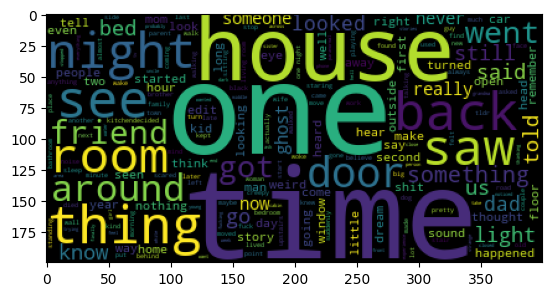


-------------------------

TOPIC  topic_1


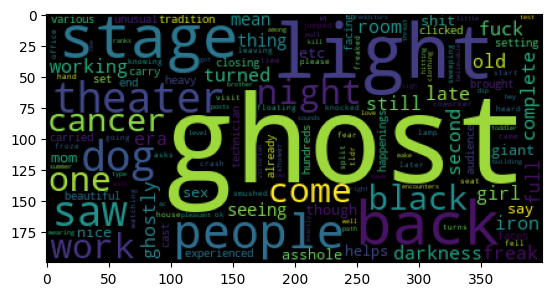


-------------------------

TOPIC  topic_2


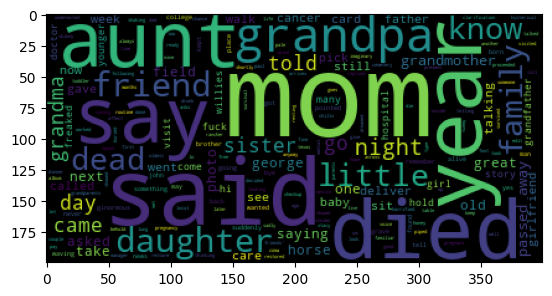


-------------------------

TOPIC  topic_3


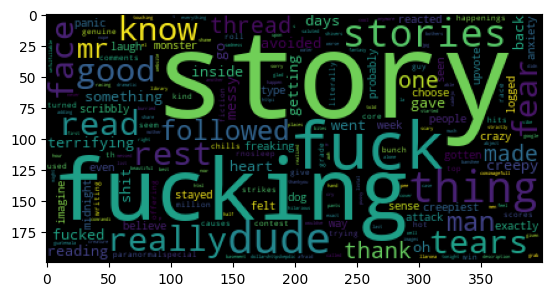


-------------------------

TOPIC  topic_4


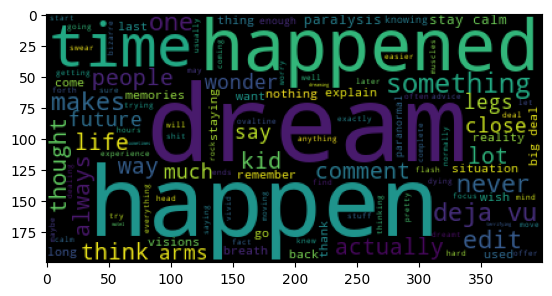


-------------------------

TOPIC  topic_5


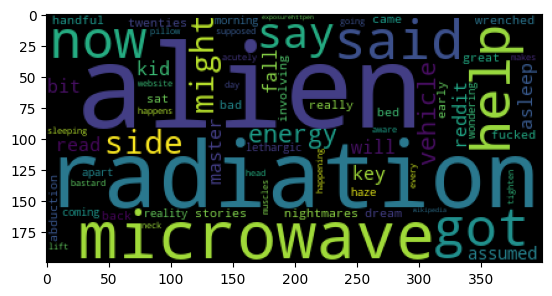


-------------------------

TOPIC  topic_6


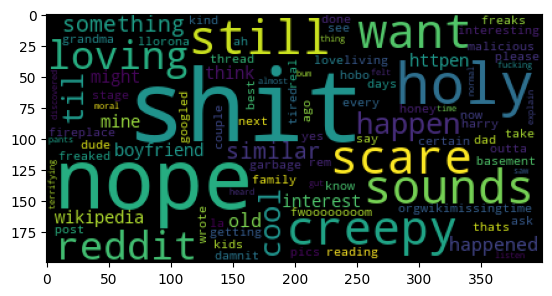


-------------------------

TOPIC  topic_7


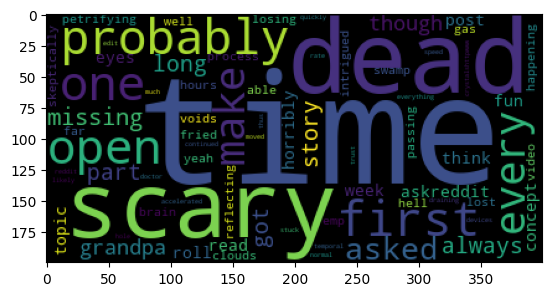


-------------------------

TOPIC  topic_8


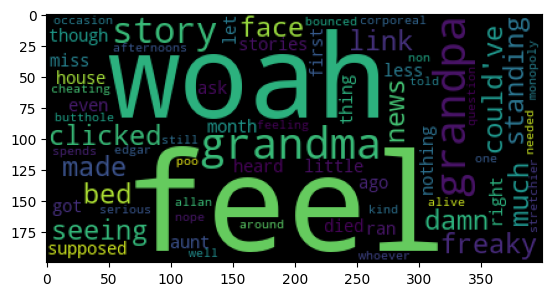


-------------------------

TOPIC  topic_9


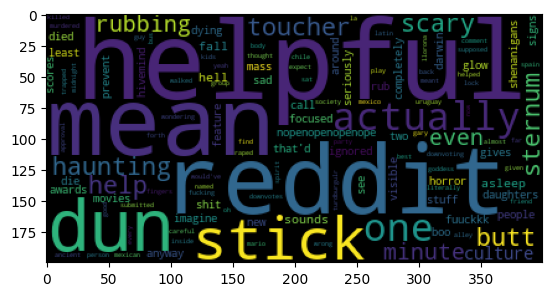


-------------------------

TOPIC  topic_10


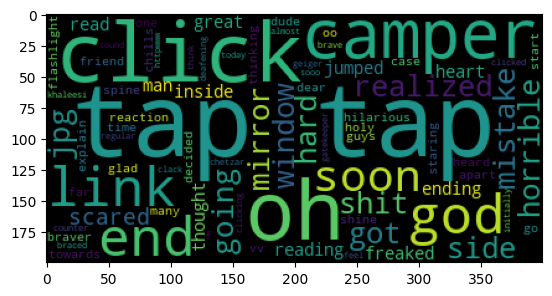


-------------------------

TOPIC  topic_11


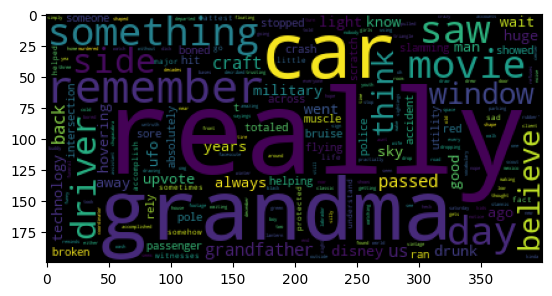

In [18]:
import wordcloud
import matplotlib.pyplot as plt

# Loop over each topic and create wordcloud from documents that are related to this main topic
wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['main_topic']==t).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()

task1

In [2]:
import gensim
from gensim.models.doc2vec import Doc2Vec
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
import nltk # Для токенізації
import os # Для перевірки існування файлу

# Завантажуємо попередньо навчену модель Doc2Vec
model_path = r"C:\Users\HP\Downloads\imdb_doc2vec_model_ua.model"

if not os.path.exists(model_path):
    print(f"Помилка: Файл моделі Doc2Vec '{model_path}' не знайдено. Завершення роботи.")
    exit()

print(f"Завантаження моделі Doc2Vec '{model_path}'...")
doc2vec_model = Doc2Vec.load(model_path) # Тепер тут буде використовуватися правильний шлях
print(f"Модель Doc2Vec '{model_path}' успішно завантажена.")


data = {
    'id': [0, 1, 2, 3, 4],
    'description': [
        "This is the first document about space and planets.",
        "The second document discusses galaxies and stars.",
        "Planets and stars are celestial bodies in space.",
        "Another story about the mysteries of the universe.",
        "Exploring deep space and distant galaxies."
    ]
}
corpus = pd.DataFrame(data)

text_column_for_doc2vec = 'description'
nltk.download('punkt', quiet=True)

def tokenize_text_for_doc2vec(text):
    if pd.isna(text):
        return []
    return nltk.word_tokenize(str(text).lower())

# генеруємо (infer) вектор для кожного документа в нашому корпусі
document_vectors = []
for text_content in corpus[text_column_for_doc2vec]:
    tokens = tokenize_text_for_doc2vec(text_content)
    vector = doc2vec_model.infer_vector(tokens)
    document_vectors.append(vector)

# Перетворюємо список векторів у NumPy масив
# еквівалент матриці X з TF-IDF
X_doc2vec = np.array(document_vectors)

print(f"Форма матриці векторів документів (X_doc2vec): {X_doc2vec.shape}")
if X_doc2vec.shape[0] == 0:
    print("")
    exit()

#  Apply LSA (TruncatedSVD) to Doc2Vec vectors
n_topics_lsa = 5 
if n_topics_lsa >= X_doc2vec.shape[1]:
    print(f" n_components ({n_topics_lsa}) має бути меншим за кількість ознак ({X_doc2vec.shape[1]}). Зменшую до {X_doc2vec.shape[1]-1}")
    n_topics_lsa = X_doc2vec.shape[1]-1
if n_topics_lsa <= 0:
    print("")
    exit()


svd_model_doc2vec = TruncatedSVD(n_components=n_topics_lsa, random_state=42) # random_state для відтворюваності
lsa_doc2vec_matrix = svd_model_doc2vec.fit_transform(X_doc2vec)

# Створюємо DataFrame з тематичними представленнями
topic_encoded_df_doc2vec = pd.DataFrame(
    lsa_doc2vec_matrix,
    columns=["topic_" + str(i) for i in range(lsa_doc2vec_matrix.shape[1])]
)
# Додаємо оригінальний текст  для довідки
topic_encoded_df_doc2vec["documents"] = corpus[text_column_for_doc2vec] # або corpus['clean_description']

print("\nDataFrame з тематичним кодуванням (Doc2Vec + LSA):")
print(topic_encoded_df_doc2vec.head())


# - Extract Main Topic for Each Document (using Doc2Vec LSA results) 
def extract_main_topics_lsa(x_row_series):
    return x_row_series.idxmax()

topic_columns_doc2vec = [col for col in topic_encoded_df_doc2vec.columns if col.startswith('topic_')]

if not topic_columns_doc2vec:
    print("")
else:
    topic_encoded_df_doc2vec['main_topic'] = topic_encoded_df_doc2vec[topic_columns_doc2vec].apply(extract_main_topics_lsa, axis=1)
    print("\nDataFrame з визначеною основною темою:")
    print(topic_encoded_df_doc2vec.head())

    # Підрахунок кожної основної теми
    print("\nПідрахунок основних тем у корпусі (Doc2Vec + LSA):")
    print(topic_encoded_df_doc2vec['main_topic'].value_counts())


#  Interpret LSA Topics (from Doc2Vec)
if hasattr(doc2vec_model, 'wv') and doc2vec_model.wv and hasattr(svd_model_doc2vec, 'components_'):
    for i, topic_vector_direction in enumerate(svd_model_doc2vec.components_):
        print(f"Тема topic_{i}:")
        # Знаходимо слова, найбільш схожі на цей напрямок теми
        # `most_similar` приймає `positive` список векторів.
        # `topic_vector_direction` - це вже вектор.
        try:
            similar_words = doc2vec_model.wv.most_similar(positive=[topic_vector_direction], topn=5)
            print("  5 найважливіших слів (за схожістю до напрямку теми):")
            for word, similarity in similar_words:
                print(f"    - {word}: {similarity:.4f}")
        except KeyError as e:
            # Це може статися, якщо вектор теми занадто відрізняється від будь-якого слова
            # або якщо словник слів порожній/маленький
            print(f"    Не вдалося знайти схожі слова для теми topic_{i}. Помилка: {e}")
        except Exception as e:
            print(f"    Не вдалося знайти схожі слова для теми topic_{i} через іншу помилку: {e}")

        print("-" * 30)
else:
    print("")

Завантаження моделі Doc2Vec 'C:\Users\HP\Downloads\imdb_doc2vec_model_ua.model'...
Модель Doc2Vec 'C:\Users\HP\Downloads\imdb_doc2vec_model_ua.model' успішно завантажена.
Форма матриці векторів документів (X_doc2vec): (5, 100)

DataFrame з тематичним кодуванням (Doc2Vec + LSA):
    topic_0   topic_1   topic_2   topic_3   topic_4  \
0 -1.424724 -0.803174  0.441788  0.047502 -0.003009   
1 -0.968596  0.327382  0.110087 -0.305950 -0.383419   
2 -1.233152  0.547125  0.269785 -0.240230  0.303424   
3 -1.691206 -0.190898 -0.685750 -0.039842  0.046375   
4 -1.036353  0.458689  0.087810  0.571508 -0.074233   

                                           documents  
0  This is the first document about space and pla...  
1  The second document discusses galaxies and stars.  
2   Planets and stars are celestial bodies in space.  
3  Another story about the mysteries of the unive...  
4         Exploring deep space and distant galaxies.  

DataFrame з визначеною основною темою:
    topic_0   topic_

Модель Doc2Vec 'C:\Users\HP\Downloads\imdb_doc2vec_model_ua.model' завантажена.


C:\Users\HP\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Завантажено 300 документів для TSNE.
Форма матриці векторів для TSNE: (300, 100)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Форма матриці після t-SNE: (300, 2)
Побудова графіку t-SNE...


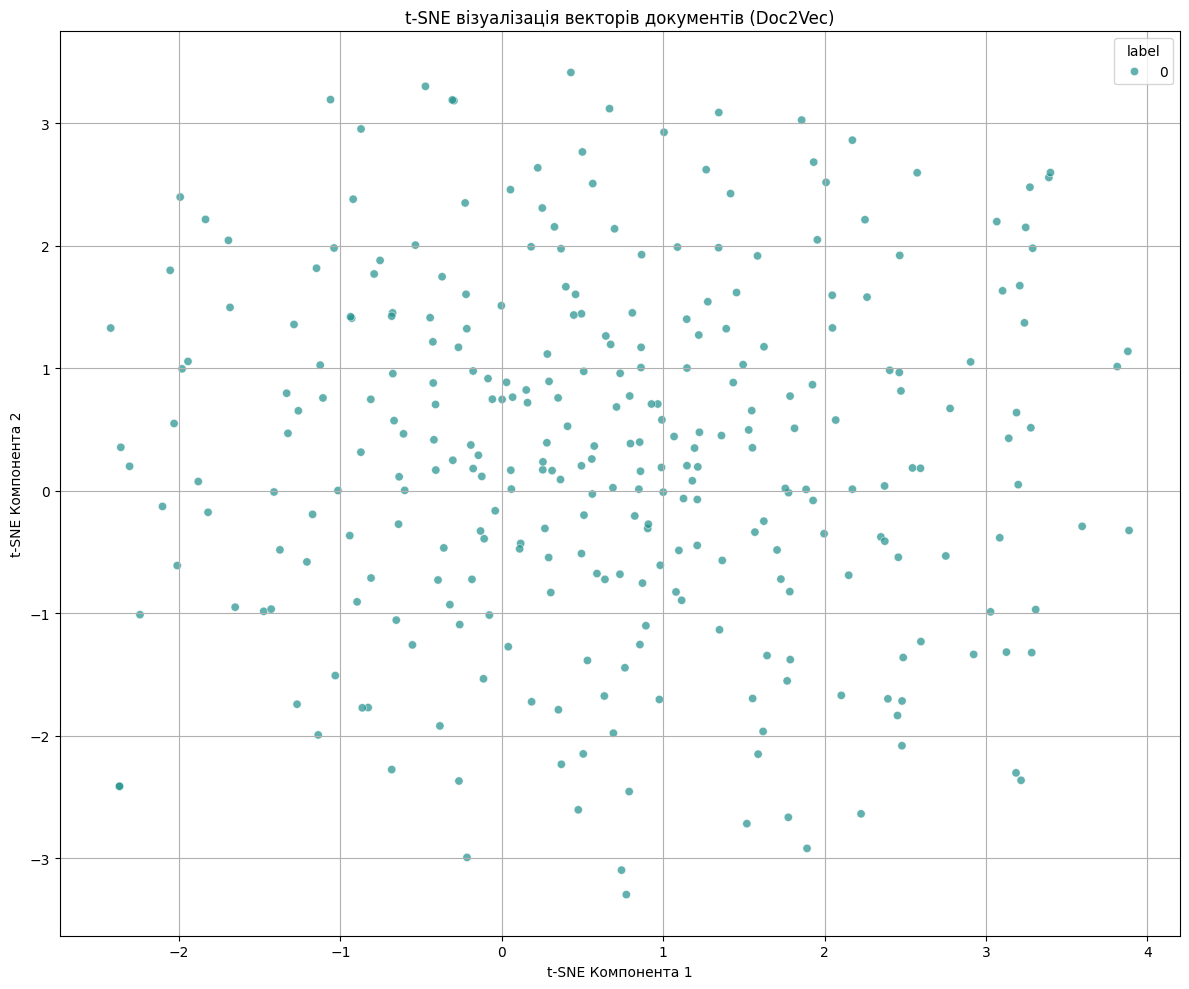

Візуалізацію t-SNE завершено.


In [6]:
import gensim
from gensim.models.doc2vec import Doc2Vec
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE # Імпорт TSNE
import nltk
import os
import matplotlib.pyplot as plt # Для візуалізації
import seaborn as sns # Для кращої візуалізації

model_path = r"C:\Users\HP\Downloads\imdb_doc2vec_model_ua.model" # Або ваш шлях

if not os.path.exists(model_path):
    print(f"Помилка: Файл моделі '{model_path}' не знайдено.")
    exit() # Завершуємо роботу, якщо модель не знайдена
doc2vec_model = Doc2Vec.load(model_path)
print(f"Модель Doc2Vec '{model_path}' завантажена.")


from datasets import load_dataset
try:
    corpus_for_tsne_hf = load_dataset("stanfordnlp/imdb", split="train[:300]")
    # Перетворюємо Hugging Face Dataset у Pandas DataFrame
    corpus_for_tsne = pd.DataFrame(corpus_for_tsne_hf)
    text_column = 'text' # Назва стовпця з текстом
    label_column = 'label' # Назва стовпця з мітками (0 або 1 для IMDB)
    print(f"Завантажено {len(corpus_for_tsne)} документів для TSNE.")
except Exception as e:
    print(f"Помилка завантаження датасету: {e}. Створюємо тестовий DataFrame.")
    # Створюємо тестовий DataFrame, якщо завантаження не вдалося
    data_tsne = {
        'id': [i for i in range(200)],
        text_column: [f"Sample document text number {i} about various topics." for i in range(200)],
        label_column: [random.choice([0, 1]) for _ in range(200)] # Випадкові мітки 0 або 1
    }
    corpus_for_tsne = pd.DataFrame(data_tsne)
    print(f"Створено тестовий DataFrame з {len(corpus_for_tsne)} документами для TSNE.")


nltk.download('punkt', quiet=True) # Завантажуємо токенізатор, якщо потрібно
def tokenize_text(text):
    if pd.isna(text): return []
    return nltk.word_tokenize(str(text).lower())

# Отримання векторів документів з Doc2Veс
document_vectors_tsne = []
actual_labels_for_tsne = [] # Зберігаємо мітки для візуалізації

# Переконуємося, що стовпці існують
if text_column not in corpus_for_tsne.columns:
    print(f"Помилка: стовпець '{text_column}' не знайдено в корпусі для TSNE.")
    exit()
if label_column not in corpus_for_tsne.columns:
    print(f"Попередження: стовпець '{label_column}' не знайдено, мітки не будуть використані для візуалізації.")
    use_labels_for_plot = False
else:
    use_labels_for_plot = True

for index, row in corpus_for_tsne.iterrows():
    text_content = row[text_column]
    tokens = tokenize_text(text_content)
    vector = doc2vec_model.infer_vector(tokens)
    document_vectors_tsne.append(vector)
    if use_labels_for_plot:
        actual_labels_for_tsne.append(row[label_column])

X_doc2vec_tsne = np.array(document_vectors_tsne)

if X_doc2vec_tsne.shape[0] == 0:
    print("Матриця векторів документів для TSNE порожня.")
    exit()
print(f"Форма матриці векторів для TSNE: {X_doc2vec_tsne.shape}")


apply_svd_before_tsne = False # Встановіть True, щоб активувати
n_components_svd = 50       # Кількість компонент для SVD (має бути < розмірності Doc2Vec векторів)

vectors_for_tsne_input = X_doc2vec_tsne
if apply_svd_before_tsne:
    if n_components_svd < X_doc2vec_tsne.shape[1] and n_components_svd < X_doc2vec_tsne.shape[0] and n_components_svd > 0:
        print(f"Застосування TruncatedSVD з {n_components_svd} компонентами перед t-SNE...")
        svd = TruncatedSVD(n_components=n_components_svd, random_state=42)
        vectors_for_tsne_input = svd.fit_transform(X_doc2vec_tsne)
        print(f"Розмірність після SVD: {vectors_for_tsne_input.shape}")
    else:
        print(f"Пропускаємо SVD: n_components_svd ({n_components_svd}) має бути > 0 та < min(кількість зразків, кількість ознак).")
        # vectors_for_tsne_input залишається X_doc2vec_tsne

#  Додавання візуалізації t-SNE 

# Ініціалізація t-SNE

perplexity_value = min(30, X_doc2vec_tsne.shape[0] - 1)
if perplexity_value <= 1: # Дуже мало зразків
    print(f"Занадто мало зразків ({X_doc2vec_tsne.shape[0]}) для t-SNE з поточною perplexity. Пропускаємо t-SNE.")
else:
    tsne_model = TSNE(
        n_components=2,         # Зменшуємо до 2D
        perplexity=perplexity_value,
        n_iter=1000,            # Кількість ітерацій (мінімум 250)
        init='pca',             # Ініціалізація (pca часто краще за random)
        learning_rate='auto',   # Автоматичне налаштування швидкості навчання
        random_state=42,        # Для відтворюваності
        n_jobs=-1               # Використовувати всі доступні ядра
    )

    # Застосовуємо t-SNE до векторів документів
    X_tsne_results = tsne_model.fit_transform(vectors_for_tsne_input)
    print(f"Форма матриці після t-SNE: {X_tsne_results.shape}")

    # --- Візуалізація результатів t-SNE ---
    print("Побудова графіку t-SNE...")
    plt.figure(figsize=(12, 10))

    if use_labels_for_plot and len(actual_labels_for_tsne) == X_tsne_results.shape[0]:
        # Використовуємо мітки для кольору, якщо вони є
        unique_labels = sorted(list(set(actual_labels_for_tsne)))

        scatter = sns.scatterplot(
            x=X_tsne_results[:, 0],
            y=X_tsne_results[:, 1],
            hue=actual_labels_for_tsne, # Використовуємо мітки для кольору
            palette="viridis", # Або інша палітра
            legend="full",
            alpha=0.7
        )
        plt.legend(title=label_column)
    else:
        # Якщо міток немає, малюємо точки одним кольором
        plt.scatter(X_tsne_results[:, 0], X_tsne_results[:, 1], alpha=0.7)

    plt.title('t-SNE візуалізація векторів документів (Doc2Vec)')
    plt.xlabel('t-SNE Компонента 1')
    plt.ylabel('t-SNE Компонента 2')
    plt.grid(True)
    plt.tight_layout() # Для кращого розміщення елементів
    plt.show()

    print("Візуалізацію t-SNE завершено.")

In [5]:
pip install seaborn

     ------------------------------------ 294.9/294.9 kB 867.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
